# 데이터시각화 특강 기말 예상문제 (ver 0.6)
> 

- toc:false
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [final]

In [196]:
#hide
import requests
from IPython.display import HTML
import plotly.express as px
import numpy as np
import json

## `#1`. COVID19 시도별 접종률 시각화 

아래의 그림은 COVID19 예방접종의 시도별 현황을 캡쳐한 것이다. 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/final_FIG1.png?raw=true)

이 정보는 특정 주기로 업데이트 되며 아래의 웹페이지 2번째 테이블에서 확인할 수 있다. 
```
https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000
```
판다스의 `pd.read_html()` 함수를 이용해 위의 페이지에서 그림1의 테이블을 읽어오라. 그리고 folium의 choroplethmap을 활용하여 시도별 2차접종의 접종률을 시각화 하라. 시각화 예시는 아래와 같다. 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/final_FIG2.png?raw=true)

---

**힌트1.** pd.read_html()을 이용할때 `encoding='utf-8'`옵션을 사용하라. 

**힌트2.** `https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000`의 2번째 테이블을 판다스로 읽어온 결과는 아래와 같아야 한다. 

In [ ]:
#hide_input
dfhtml='<table border="1" class="dataframe">\n  <thead>\n    <tr>\n      <th></th>\n      <th>구분</th>\n      <th colspan="2" halign="left">1차접종</th>\n      <th colspan="2" halign="left">2차접종</th>\n      <th colspan="2" halign="left">3차(부스터)접종</th>\n    </tr>\n    <tr>\n      <th></th>\n      <th>구분</th>\n      <th>당일 실적</th>\n      <th>당일 누계</th>\n      <th>당일 실적</th>\n      <th>당일 누계</th>\n      <th>당일 실적</th>\n      <th>당일 누계</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>합계</td>\n      <td>22505</td>\n      <td>42618296</td>\n      <td>60388</td>\n      <td>41192348</td>\n      <td>179831</td>\n      <td>3570414</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>서울</td>\n      <td>3613</td>\n      <td>7933770</td>\n      <td>8315</td>\n      <td>7698119</td>\n      <td>34397</td>\n      <td>649999</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>부산</td>\n      <td>1355</td>\n      <td>2724073</td>\n      <td>2942</td>\n      <td>2631501</td>\n      <td>11161</td>\n      <td>209295</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>대구</td>\n      <td>925</td>\n      <td>1895746</td>\n      <td>2485</td>\n      <td>1830009</td>\n      <td>7258</td>\n      <td>130330</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>인천</td>\n      <td>1331</td>\n      <td>2430994</td>\n      <td>3781</td>\n      <td>2346905</td>\n      <td>9049</td>\n      <td>183461</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>광주</td>\n      <td>669</td>\n      <td>1190287</td>\n      <td>2190</td>\n      <td>1143284</td>\n      <td>4852</td>\n      <td>108004</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>대전</td>\n      <td>659</td>\n      <td>1173714</td>\n      <td>1692</td>\n      <td>1132714</td>\n      <td>5326</td>\n      <td>92697</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>울산</td>\n      <td>527</td>\n      <td>908812</td>\n      <td>1657</td>\n      <td>879965</td>\n      <td>3311</td>\n      <td>59007</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>세종</td>\n      <td>146</td>\n      <td>272339</td>\n      <td>357</td>\n      <td>261860</td>\n      <td>989</td>\n      <td>22115</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>경기</td>\n      <td>6180</td>\n      <td>11154058</td>\n      <td>16579</td>\n      <td>10788551</td>\n      <td>39809</td>\n      <td>876808</td>\n    </tr>\n    <tr>\n      <th>10</th>\n      <td>강원</td>\n      <td>718</td>\n      <td>1279589</td>\n      <td>2076</td>\n      <td>1237178</td>\n      <td>6373</td>\n      <td>118575</td>\n    </tr>\n    <tr>\n      <th>11</th>\n      <td>충북</td>\n      <td>668</td>\n      <td>1352302</td>\n      <td>2529</td>\n      <td>1307212</td>\n      <td>6536</td>\n      <td>124993</td>\n    </tr>\n    <tr>\n      <th>12</th>\n      <td>충남</td>\n      <td>952</td>\n      <td>1789964</td>\n      <td>2610</td>\n      <td>1725422</td>\n      <td>8595</td>\n      <td>170692</td>\n    </tr>\n    <tr>\n      <th>13</th>\n      <td>전북</td>\n      <td>755</td>\n      <td>1514759</td>\n      <td>2705</td>\n      <td>1460057</td>\n      <td>9037</td>\n      <td>160277</td>\n    </tr>\n    <tr>\n      <th>14</th>\n      <td>전남</td>\n      <td>792</td>\n      <td>1575741</td>\n      <td>2498</td>\n      <td>1520694</td>\n      <td>9319</td>\n      <td>199860</td>\n    </tr>\n    <tr>\n      <th>15</th>\n      <td>경북</td>\n      <td>1255</td>\n      <td>2160015</td>\n      <td>2942</td>\n      <td>2085263</td>\n      <td>9743</td>\n      <td>193965</td>\n    </tr>\n    <tr>\n      <th>16</th>\n      <td>경남</td>\n      <td>1510</td>\n      <td>2712518</td>\n      <td>3997</td>\n      <td>2614451</td>\n      <td>11699</td>\n      <td>226671</td>\n    </tr>\n    <tr>\n      <th>17</th>\n      <td>제주</td>\n      <td>450</td>\n      <td>549615</td>\n      <td>1033</td>\n      <td>529163</td>\n      <td>2377</td>\n      <td>43665</td>\n    </tr>\n  </tbody>\n</table>'
HTML(dfhtml)

- 위의 df는 예시일 뿐이며 시간에 따라 정보가 업데이트 되어 달라질 수 있음 

**힌트3.** 아래의 주소에서 json을 파일을 읽어온뒤 choroplethmap을 그릴때 이용하라. 
```
https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json
```

**힌트4.** json파일의 지역명과 `https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000`의 지역이름을 맞추어라. json파일의 지역명은 아래와 같은 코드로 확인할 수 있다. 
```python
[global_dict['features'][i]['properties']['name'] for i in range(17)]
```
```
['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']
```

- 여기에서 `global_dict`는 힌트3의 json파일이 저장된 dictionary 이다

**힌트5.** 지역별 접종률은 아래의 수식으로 구한다. 

$$
\textbf{서울특별시 2차접종 접종률}=\frac{\textbf{서울특별시 2차접종 당일누계}}{\textbf{서울특별시 인구수}}
$$

이때 위의 수식의 분모에 사용할 시도별 인구수는 아래의 주소에서 얻을 수 있다. 
```
https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-11-22-prov.csv
```

**힌트6.** `eval()`을 이용하면 데이터프레임에서 간단한 column별 연산을 수행할 수 있다. (필요하다면 참고하라) 

(예제) 아래의 데이터프레임에서 $x/y$를 수행하고 결과를 $z$에 저장하라. 

In [1]:
import pandas as pd 
df= pd.DataFrame({'x':[1,2,3,4,5],'y':[2,2,2,3,3]})
df

,x,y
0,1,2
1,2,2
2,3,2
3,4,3
4,5,3


(풀이1)

In [ ]:
df.assign(z=list(map(lambda x,y: x/y, df.x,df.y)))

,x,y,z
0,1,2,0.500000
1,2,2,1.000000
2,3,2,1.500000
3,4,3,1.333333
4,5,3,1.666667


(풀이2)

In [ ]:
df.eval('z=x/y')

,x,y,z
0,1,2,0.500000
1,2,2,1.000000
2,3,2,1.500000
3,4,3,1.333333
4,5,3,1.666667


`-` 물론 아래와 같이 수행해도 된다

```python
df['z']= df['x']/df['y']
df
```

**힌트7.** 시도별 접종률의 결과는 아래와 같다. 

In [ ]:
#hide_input
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>prov</th>\n      <th>prop</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>서울특별시</td>\n      <td>0.807572</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>부산광역시</td>\n      <td>0.784046</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>대구광역시</td>\n      <td>0.765463</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>인천광역시</td>\n      <td>0.796909</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>광주광역시</td>\n      <td>0.792597</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>대전광역시</td>\n      <td>0.778911</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>울산광역시</td>\n      <td>0.783887</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>세종특별자치시</td>\n      <td>0.711043</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>경기도</td>\n      <td>0.796228</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>강원도</td>\n      <td>0.804555</td>\n    </tr>\n    <tr>\n      <th>10</th>\n      <td>충청북도</td>\n      <td>0.818569</td>\n    </tr>\n    <tr>\n      <th>11</th>\n      <td>충청남도</td>\n      <td>0.814271</td>\n    </tr>\n    <tr>\n      <th>12</th>\n      <td>전라북도</td>\n      <td>0.815779</td>\n    </tr>\n    <tr>\n      <th>13</th>\n      <td>전라남도</td>\n      <td>0.828873</td>\n    </tr>\n    <tr>\n      <th>14</th>\n      <td>경상북도</td>\n      <td>0.793502</td>\n    </tr>\n    <tr>\n      <th>15</th>\n      <td>경상남도</td>\n      <td>0.787922</td>\n    </tr>\n    <tr>\n      <th>16</th>\n      <td>제주특별자치도</td>\n      <td>0.782127</td>\n    </tr>\n  </tbody>\n</table>')

,prov,prop
0,서울특별시,0.807572
1,부산광역시,0.784046
2,대구광역시,0.765463
3,인천광역시,0.796909
4,광주광역시,0.792597
5,대전광역시,0.778911
6,울산광역시,0.783887
7,세종특별자치시,0.711043
8,경기도,0.796228
9,강원도,0.804555


## `#2`. COVID19 시도별/월별 확산과정 시각화

아래는 COVID19 확진자수를 지역별로 매일 기록한 자료이다. 
```
https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv
```
자료를 판다스로 불러온 결과는 아래와 같다. 

In [ ]:
#hide_input
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>일자</th>\n      <th>계(명)</th>\n      <th>서울</th>\n      <th>부산</th>\n      <th>대구</th>\n      <th>인천</th>\n      <th>광주</th>\n      <th>대전</th>\n      <th>울산</th>\n      <th>세종</th>\n      <th>경기</th>\n      <th>강원</th>\n      <th>충북</th>\n      <th>충남</th>\n      <th>전북</th>\n      <th>전남</th>\n      <th>경북</th>\n      <th>경남</th>\n      <th>제주</th>\n      <th>검역</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>누적(명)</td>\n      <td>457,612</td>\n      <td>158,774</td>\n      <td>16,555</td>\n      <td>19,114</td>\n      <td>25,299</td>\n      <td>6,353</td>\n      <td>8,809</td>\n      <td>5,675</td>\n      <td>1,588</td>\n      <td>136,546</td>\n      <td>8,889</td>\n      <td>8,942</td>\n      <td>13,174</td>\n      <td>6,453</td>\n      <td>4,498</td>\n      <td>11,471</td>\n      <td>15,236</td>\n      <td>3,762</td>\n      <td>6,474</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2020-01-20</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2020-01-21</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2020-01-22</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>2020-01-23</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>...</th>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n    </tr>\n    <tr>\n      <th>679</th>\n      <td>2021-11-28</td>\n      <td>3,925</td>\n      <td>1,673</td>\n      <td>148</td>\n      <td>106</td>\n      <td>278</td>\n      <td>52</td>\n      <td>53</td>\n      <td>4</td>\n      <td>5</td>\n      <td>1,090</td>\n      <td>63</td>\n      <td>25</td>\n      <td>121</td>\n      <td>45</td>\n      <td>25</td>\n      <td>103</td>\n      <td>89</td>\n      <td>35</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>680</th>\n      <td>2021-11-29</td>\n      <td>3,308</td>\n      <td>1,393</td>\n      <td>144</td>\n      <td>88</td>\n      <td>233</td>\n      <td>61</td>\n      <td>43</td>\n      <td>2</td>\n      <td>15</td>\n      <td>910</td>\n      <td>56</td>\n      <td>33</td>\n      <td>52</td>\n      <td>49</td>\n      <td>28</td>\n      <td>68</td>\n      <td>86</td>\n      <td>44</td>\n      <td>3</td>\n    </tr>\n    <tr>\n      <th>681</th>\n      <td>2021-11-30</td>\n      <td>3,032</td>\n      <td>1,186</td>\n      <td>79</td>\n      <td>78</td>\n      <td>192</td>\n      <td>52</td>\n      <td>43</td>\n      <td>3</td>\n      <td>22</td>\n      <td>909</td>\n      <td>84</td>\n      <td>59</td>\n      <td>81</td>\n      <td>50</td>\n      <td>36</td>\n      <td>68</td>\n      <td>60</td>\n      <td>22</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>682</th>\n      <td>2021-12-01</td>\n      <td>5,123</td>\n      <td>2,222</td>\n      <td>143</td>\n      <td>86</td>\n      <td>326</td>\n      <td>29</td>\n      <td>88</td>\n      <td>17</td>\n      <td>20</td>\n      <td>1,582</td>\n      <td>105</td>\n      <td>48</td>\n      <td>96</td>\n      <td>50</td>\n      <td>40</td>\n      <td>97</td>\n      <td>127</td>\n      <td>27</td>\n      <td>20</td>\n    </tr>\n    <tr>\n      <th>683</th>\n      <td>2021-12-02</td>\n      <td>5,266</td>\n      <td>2,268</td>\n      <td>158</td>\n      <td>70</td>\n      <td>355</td>\n      <td>39</td>\n      <td>166</td>\n      <td>18</td>\n      <td>8</td>\n      <td>1,495</td>\n      <td>145</td>\n      <td>49</td>\n      <td>149</td>\n      <td>71</td>\n      <td>39</td>\n      <td>106</td>\n      <td>94</td>\n      <td>31</td>\n      <td>5</td>\n    </tr>\n  </tbody>\n</table>')

,일자,계(명),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
0,누적(명),"457,612","158,774","16,555","19,114","25,299","6,353","8,809","5,675","1,588","136,546","8,889","8,942","13,174","6,453","4,498","11,471","15,236","3,762","6,474"
1,2020-01-20,1,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,2020-01-21,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,2020-01-22,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2020-01-23,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,2021-11-28,"3,925","1,673",148,106,278,52,53,4,5,"1,090",63,25,121,45,25,103,89,35,10
680,2021-11-29,"3,308","1,393",144,88,233,61,43,2,15,910,56,33,52,49,28,68,86,44,3
681,2021-11-30,"3,032","1,186",79,78,192,52,43,3,22,909,84,59,81,50,36,68,60,22,8
682,2021-12-01,"5,123","2,222",143,86,326,29,88,17,20,"1,582",105,48,96,50,40,97,127,27,20


In [222]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv').iloc[1:]

일별로 기록된 COVID19 확진자수를 월별로 통합한 뒤 `2021-01 ~ 2021-10` 기간의 발생률을 계산하여 시각화하라. 시각화는 `plotly`의 `choropleth_mapbox`를 이용하며 시간의 추이를 표현하기 위해 `animation_frame` 옵션을 사용한다. 시각화 예시는 아래와 같다. 

In [223]:
df.query('일자>"2021-01-01" and 일자<"2021-10-10"').reset_index().iloc[:,1:]

,일자,계(명),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
0,2021-01-02,820,250,26,29,71,13,4,17,3,227,31,36,7,11,11,20,37,13,14
1,2021-01-03,657,198,19,22,48,26,8,7,1,204,33,27,9,5,12,14,12,4,8
2,2021-01-04,"1,020",329,37,29,103,74,6,5,-,268,28,23,23,13,3,25,33,10,11
3,2021-01-05,714,199,15,32,49,23,8,4,-,230,27,32,18,5,4,24,21,8,15
4,2021-01-06,838,263,38,21,38,30,9,2,1,284,16,21,24,22,1,28,29,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-10-05,"1,574",521,47,50,106,15,39,12,10,496,24,44,34,23,13,57,70,5,8
277,2021-10-06,"2,027",690,38,64,133,16,31,4,5,685,31,38,69,20,13,55,120,4,11
278,2021-10-07,"2,425",836,49,46,200,13,30,14,11,856,29,74,52,24,18,55,96,9,13
279,2021-10-08,"2,171",772,34,45,128,25,31,16,10,759,33,64,60,22,17,77,55,9,14


In [224]:
_df=_

In [225]:
def f(x): 
    if x<"2021-01-31": y='2021-01' 
    elif x<"2021-02-28": y='2021-02'
    elif x<"2021-03-31": y='2021-03'
    elif x<"2021-04-30": y='2021-04'
    elif x<"2021-05-31": y='2021-05'
    elif x<"2021-06-30": y='2021-06'
    elif x<"2021-07-31": y='2021-07'
    elif x<"2021-08-31": y='2021-08'
    elif x<"2021-09-30": y='2021-09'
    else:  y='2021-10'
    return y 

In [227]:
_df['ym']=list(map(f,df.query('일자>"2021-01-01" and 일자<"2021-10-10"').reset_index().iloc[:,1:].일자))
_df

,일자,계(명),서울,부산,대구,인천,광주,대전,울산,세종,...,강원,충북,충남,전북,전남,경북,경남,제주,검역,ym
0,2021-01-02,820,250,26,29,71,13,4,17,3,...,31,36,7,11,11,20,37,13,14,2021-01
1,2021-01-03,657,198,19,22,48,26,8,7,1,...,33,27,9,5,12,14,12,4,8,2021-01
2,2021-01-04,"1,020",329,37,29,103,74,6,5,-,...,28,23,23,13,3,25,33,10,11,2021-01
3,2021-01-05,714,199,15,32,49,23,8,4,-,...,27,32,18,5,4,24,21,8,15,2021-01
4,2021-01-06,838,263,38,21,38,30,9,2,1,...,16,21,24,22,1,28,29,5,6,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-10-05,"1,574",521,47,50,106,15,39,12,10,...,24,44,34,23,13,57,70,5,8,2021-10
277,2021-10-06,"2,027",690,38,64,133,16,31,4,5,...,31,38,69,20,13,55,120,4,11,2021-10
278,2021-10-07,"2,425",836,49,46,200,13,30,14,11,...,29,74,52,24,18,55,96,9,13,2021-10
279,2021-10-08,"2,171",772,34,45,128,25,31,16,10,...,33,64,60,22,17,77,55,9,14,2021-10


In [262]:
_df.set_index('ym').iloc[:,2:19].applymap(lambda x: x.replace(',','') if x!='-' else None).applymap(lambda x: float(x) if x!=None else None).groupby('ym').agg(np.mean).T

ym,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
서울,162.172414,145.000000,121.161290,191.266667,199.193548,194.233333,460.129032,484.516129,688.200000,748.7
부산,28.000000,17.178571,17.096774,42.333333,20.451613,18.533333,62.161290,103.483871,44.333333,40.5
대구,15.655172,11.392857,9.516129,14.166667,17.677419,23.400000,33.419355,63.612903,61.033333,61.9
인천,30.620690,22.357143,19.838710,20.600000,17.258065,18.366667,71.838710,90.000000,130.000000,136.9
광주,23.034483,10.857143,4.419355,7.333333,12.483871,4.633333,14.387097,21.193548,30.766667,20.7
대전,8.925926,4.181818,3.750000,14.000000,12.032258,18.433333,47.677419,48.709677,44.533333,34.9
울산,7.678571,3.208333,5.000000,22.500000,24.419355,8.750000,11.903226,31.032258,32.900000,15.2
세종,2.444444,1.529412,2.357143,3.961538,4.840000,3.076923,5.566667,8.419355,8.000000,8.3
경기,170.896552,132.821429,163.193548,185.900000,158.258065,162.266667,373.096774,492.290323,619.833333,711.3
강원,15.586207,6.107143,14.645161,12.200000,15.935484,12.333333,29.354839,31.483871,32.500000,34.9


In [263]:
_df2=_

In [105]:
#hide_input
HTML(requests.get('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/_html').text)

NameError: name 'HTML' is not defined

---

**힌트1.** 아래의 주소에서 json을 파일을 읽어온뒤 choroplethmap을 그릴때 이용하라. 
```
https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json
```

In [246]:
global_dict=json.loads(requests.get('https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json').text)

**힌트2.** json파일의 지역명과 `https://ncv.kdca.go.kr/mainStatus.es?mid=a11702000000`의 지역이름을 맞추어라. json파일의 지역명은 아래와 같은 코드로 확인할 수 있다. 
```python
[global_dict['features'][i]['properties']['name'] for i in range(17)]
```
```
['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']
```

- 여기에서 `global_dict`는 힌트1의 json파일이 저장된 dictionary이다. 

**힌트3.** 각 지역의 월별 발생률은 아래의 수식으로 구한다. 

$$
\textbf{2021-01 서울특별시 코로나 발생률}=\frac{\textbf{2021-01 서울특별시 코로나 확진자수 총합}}{\textbf{서울특별시 인구수}}
$$

이때 위의 수식의 분모에 사용할 시도별 인구수는 아래의 주소에서 얻을 수 있다. 
```
https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-11-22-prov.csv
```

In [267]:
pop=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-11-22-prov.csv')
pop.columns=['prov','pop']

In [294]:
_df2.iloc[0,:]/pop['pop'][0]

ym
2021-01    0.000017
2021-02    0.000015
2021-03    0.000013
2021-04    0.000020
2021-05    0.000021
2021-06    0.000020
2021-07    0.000048
2021-08    0.000051
2021-09    0.000072
2021-10    0.000079
Name: 서울, dtype: float64

In [ ]:
[_df2.iloc[i,:]/pop['pop'][i] for i in range(17)]

In [299]:
pd.DataFrame({'prov':pop['prov'],'2021-01':'2021-10':[_df2.iloc[i,:]/pop['pop'][i] for i in range(17)]})

SyntaxError: invalid syntax (2196485427.py, line 1)

**힌트4**. `3,925`와 같은 문자열을 처리하기 위해 아래를 참고하라. 

In [ ]:
'3,925'.replace(',','')

'3925'

**힌트5.** 시각화에 사용할 데이터프레임의 형태 및 핵심정보는 아래와 같다. 

In [ ]:
#hide_input
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>ym</th>\n      <th>prov</th>\n      <th>confirmed</th>\n      <th>pop</th>\n      <th>prop</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>2021-01</td>\n      <td>강원도</td>\n      <td>488.0</td>\n      <td>1537717</td>\n      <td>0.000317</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2021-02</td>\n      <td>강원도</td>\n      <td>169.0</td>\n      <td>1537717</td>\n      <td>0.000110</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2021-03</td>\n      <td>강원도</td>\n      <td>466.0</td>\n      <td>1537717</td>\n      <td>0.000303</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2021-04</td>\n      <td>강원도</td>\n      <td>354.0</td>\n      <td>1537717</td>\n      <td>0.000230</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>2021-05</td>\n      <td>강원도</td>\n      <td>501.0</td>\n      <td>1537717</td>\n      <td>0.000326</td>\n    </tr>\n    <tr>\n      <th>...</th>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n    </tr>\n    <tr>\n      <th>165</th>\n      <td>2021-06</td>\n      <td>충청북도</td>\n      <td>363.0</td>\n      <td>1596948</td>\n      <td>0.000227</td>\n    </tr>\n    <tr>\n      <th>166</th>\n      <td>2021-07</td>\n      <td>충청북도</td>\n      <td>544.0</td>\n      <td>1596948</td>\n      <td>0.000341</td>\n    </tr>\n    <tr>\n      <th>167</th>\n      <td>2021-08</td>\n      <td>충청북도</td>\n      <td>1302.0</td>\n      <td>1596948</td>\n      <td>0.000815</td>\n    </tr>\n    <tr>\n      <th>168</th>\n      <td>2021-09</td>\n      <td>충청북도</td>\n      <td>1192.0</td>\n      <td>1596948</td>\n      <td>0.000746</td>\n    </tr>\n    <tr>\n      <th>169</th>\n      <td>2021-10</td>\n      <td>충청북도</td>\n      <td>1556.0</td>\n      <td>1596948</td>\n      <td>0.000974</td>\n    </tr>\n  </tbody>\n</table>')

,ym,prov,confirmed,pop,prop
0,2021-01,강원도,488.0,1537717,0.000317
1,2021-02,강원도,169.0,1537717,0.000110
2,2021-03,강원도,466.0,1537717,0.000303
3,2021-04,강원도,354.0,1537717,0.000230
4,2021-05,강원도,501.0,1537717,0.000326
...,...,...,...,...,...
165,2021-06,충청북도,363.0,1596948,0.000227
166,2021-07,충청북도,544.0,1596948,0.000341
167,2021-08,충청북도,1302.0,1596948,0.000815
168,2021-09,충청북도,1192.0,1596948,0.000746


**힌트 6**. 데이터프레임이 힌트5와 유사한 형태로 정리되었다는 가정하에 적절한 시각화 코드는 아래와 같다. (여기에서 `df`는 힌트5의 데이터프레임, `global_dict`는 힌트1~2의 json파일이 저장된 dictionary 이다) 

```python
import plotly.express as px
from IPython.display import HTML
fig=px.choropleth_mapbox(df, 
                     geojson=global_dict, 
                     color=??,
                     locations=?? 
                     animation_frame='ym',
                     featureidkey=??,
                     center={"lat": 36, "lon": 128},
                     mapbox_style="carto-positron", 
                     range_color=(0, df.prop.max()),
                     height=1200,
                     zoom=6.5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
HTML(fig.to_html(include_mathjax=False, config=dict({'scrollZoom':False})))
```

- 주의: 컴퓨터 사양에 따라 시각화이후 컴퓨터가 심하게 느려질 수 있는데 이 경우 반드시 주피터 노트북에 시각화 결과를 임베딩하여 제출할 필요가 없다. 즉 아래의 같이 시각화를 수행하는 코드를 따로 주석처리 하여 제출하여도 무방하다. (의미가 이해안되면 질문하세요.) 

```python
import plotly.express as px
from IPython.display import HTML
fig=px.choropleth_mapbox(df, 
                     geojson=global_dict, 
                     color=??,
                     locations=?? 
                     animation_frame='ym',
                     featureidkey=??,
                     center={"lat": 36, "lon": 128},
                     mapbox_style="carto-positron", 
                     range_color=(0, df.prop.max()),
                     height=1200,
                     zoom=6.5)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
_html=fig.to_html(include_mathjax=False, config=dict({'scrollZoom':False}))
#HTML(_html)
```

**힌트 7**. 아래의 자료에서 `-`는 확진자가 없다는 의미이므로 0으로 생각해도 무방하다. 

In [ ]:
#hide_input
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>일자</th>\n      <th>계(명)</th>\n      <th>서울</th>\n      <th>부산</th>\n      <th>대구</th>\n      <th>인천</th>\n      <th>광주</th>\n      <th>대전</th>\n      <th>울산</th>\n      <th>세종</th>\n      <th>경기</th>\n      <th>강원</th>\n      <th>충북</th>\n      <th>충남</th>\n      <th>전북</th>\n      <th>전남</th>\n      <th>경북</th>\n      <th>경남</th>\n      <th>제주</th>\n      <th>검역</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>누적(명)</td>\n      <td>457,612</td>\n      <td>158,774</td>\n      <td>16,555</td>\n      <td>19,114</td>\n      <td>25,299</td>\n      <td>6,353</td>\n      <td>8,809</td>\n      <td>5,675</td>\n      <td>1,588</td>\n      <td>136,546</td>\n      <td>8,889</td>\n      <td>8,942</td>\n      <td>13,174</td>\n      <td>6,453</td>\n      <td>4,498</td>\n      <td>11,471</td>\n      <td>15,236</td>\n      <td>3,762</td>\n      <td>6,474</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2020-01-20</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2020-01-21</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2020-01-22</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>2020-01-23</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>...</th>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n    </tr>\n    <tr>\n      <th>679</th>\n      <td>2021-11-28</td>\n      <td>3,925</td>\n      <td>1,673</td>\n      <td>148</td>\n      <td>106</td>\n      <td>278</td>\n      <td>52</td>\n      <td>53</td>\n      <td>4</td>\n      <td>5</td>\n      <td>1,090</td>\n      <td>63</td>\n      <td>25</td>\n      <td>121</td>\n      <td>45</td>\n      <td>25</td>\n      <td>103</td>\n      <td>89</td>\n      <td>35</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>680</th>\n      <td>2021-11-29</td>\n      <td>3,308</td>\n      <td>1,393</td>\n      <td>144</td>\n      <td>88</td>\n      <td>233</td>\n      <td>61</td>\n      <td>43</td>\n      <td>2</td>\n      <td>15</td>\n      <td>910</td>\n      <td>56</td>\n      <td>33</td>\n      <td>52</td>\n      <td>49</td>\n      <td>28</td>\n      <td>68</td>\n      <td>86</td>\n      <td>44</td>\n      <td>3</td>\n    </tr>\n    <tr>\n      <th>681</th>\n      <td>2021-11-30</td>\n      <td>3,032</td>\n      <td>1,186</td>\n      <td>79</td>\n      <td>78</td>\n      <td>192</td>\n      <td>52</td>\n      <td>43</td>\n      <td>3</td>\n      <td>22</td>\n      <td>909</td>\n      <td>84</td>\n      <td>59</td>\n      <td>81</td>\n      <td>50</td>\n      <td>36</td>\n      <td>68</td>\n      <td>60</td>\n      <td>22</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>682</th>\n      <td>2021-12-01</td>\n      <td>5,123</td>\n      <td>2,222</td>\n      <td>143</td>\n      <td>86</td>\n      <td>326</td>\n      <td>29</td>\n      <td>88</td>\n      <td>17</td>\n      <td>20</td>\n      <td>1,582</td>\n      <td>105</td>\n      <td>48</td>\n      <td>96</td>\n      <td>50</td>\n      <td>40</td>\n      <td>97</td>\n      <td>127</td>\n      <td>27</td>\n      <td>20</td>\n    </tr>\n    <tr>\n      <th>683</th>\n      <td>2021-12-02</td>\n      <td>5,266</td>\n      <td>2,268</td>\n      <td>158</td>\n      <td>70</td>\n      <td>355</td>\n      <td>39</td>\n      <td>166</td>\n      <td>18</td>\n      <td>8</td>\n      <td>1,495</td>\n      <td>145</td>\n      <td>49</td>\n      <td>149</td>\n      <td>71</td>\n      <td>39</td>\n      <td>106</td>\n      <td>94</td>\n      <td>31</td>\n      <td>5</td>\n    </tr>\n  </tbody>\n</table>')

,일자,계(명),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
0,누적(명),"457,612","158,774","16,555","19,114","25,299","6,353","8,809","5,675","1,588","136,546","8,889","8,942","13,174","6,453","4,498","11,471","15,236","3,762","6,474"
1,2020-01-20,1,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,2020-01-21,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,2020-01-22,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2020-01-23,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,2021-11-28,"3,925","1,673",148,106,278,52,53,4,5,"1,090",63,25,121,45,25,103,89,35,10
680,2021-11-29,"3,308","1,393",144,88,233,61,43,2,15,910,56,33,52,49,28,68,86,44,3
681,2021-11-30,"3,032","1,186",79,78,192,52,43,3,22,909,84,59,81,50,36,68,60,22,8
682,2021-12-01,"5,123","2,222",143,86,326,29,88,17,20,"1,582",105,48,96,50,40,97,127,27,20


## `#3`. COVID19 시도별/일별 감염자수 시각화

아래는 COVID19 확진자수를 지역별로 매일 기록한 자료이다. (`#2`와 동일한 자료임)
```
https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv
```
자료를 판다스로 불러온 결과는 아래와 같다. 

In [300]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/covid19_20211202.csv')

In [ ]:
#hide_input
HTML('<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>일자</th>\n      <th>계(명)</th>\n      <th>서울</th>\n      <th>부산</th>\n      <th>대구</th>\n      <th>인천</th>\n      <th>광주</th>\n      <th>대전</th>\n      <th>울산</th>\n      <th>세종</th>\n      <th>경기</th>\n      <th>강원</th>\n      <th>충북</th>\n      <th>충남</th>\n      <th>전북</th>\n      <th>전남</th>\n      <th>경북</th>\n      <th>경남</th>\n      <th>제주</th>\n      <th>검역</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>누적(명)</td>\n      <td>457,612</td>\n      <td>158,774</td>\n      <td>16,555</td>\n      <td>19,114</td>\n      <td>25,299</td>\n      <td>6,353</td>\n      <td>8,809</td>\n      <td>5,675</td>\n      <td>1,588</td>\n      <td>136,546</td>\n      <td>8,889</td>\n      <td>8,942</td>\n      <td>13,174</td>\n      <td>6,453</td>\n      <td>4,498</td>\n      <td>11,471</td>\n      <td>15,236</td>\n      <td>3,762</td>\n      <td>6,474</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2020-01-20</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>1</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2020-01-21</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2020-01-22</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>2020-01-23</td>\n      <td>0</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n      <td>-</td>\n    </tr>\n    <tr>\n      <th>...</th>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n      <td>...</td>\n    </tr>\n    <tr>\n      <th>679</th>\n      <td>2021-11-28</td>\n      <td>3,925</td>\n      <td>1,673</td>\n      <td>148</td>\n      <td>106</td>\n      <td>278</td>\n      <td>52</td>\n      <td>53</td>\n      <td>4</td>\n      <td>5</td>\n      <td>1,090</td>\n      <td>63</td>\n      <td>25</td>\n      <td>121</td>\n      <td>45</td>\n      <td>25</td>\n      <td>103</td>\n      <td>89</td>\n      <td>35</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>680</th>\n      <td>2021-11-29</td>\n      <td>3,308</td>\n      <td>1,393</td>\n      <td>144</td>\n      <td>88</td>\n      <td>233</td>\n      <td>61</td>\n      <td>43</td>\n      <td>2</td>\n      <td>15</td>\n      <td>910</td>\n      <td>56</td>\n      <td>33</td>\n      <td>52</td>\n      <td>49</td>\n      <td>28</td>\n      <td>68</td>\n      <td>86</td>\n      <td>44</td>\n      <td>3</td>\n    </tr>\n    <tr>\n      <th>681</th>\n      <td>2021-11-30</td>\n      <td>3,032</td>\n      <td>1,186</td>\n      <td>79</td>\n      <td>78</td>\n      <td>192</td>\n      <td>52</td>\n      <td>43</td>\n      <td>3</td>\n      <td>22</td>\n      <td>909</td>\n      <td>84</td>\n      <td>59</td>\n      <td>81</td>\n      <td>50</td>\n      <td>36</td>\n      <td>68</td>\n      <td>60</td>\n      <td>22</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>682</th>\n      <td>2021-12-01</td>\n      <td>5,123</td>\n      <td>2,222</td>\n      <td>143</td>\n      <td>86</td>\n      <td>326</td>\n      <td>29</td>\n      <td>88</td>\n      <td>17</td>\n      <td>20</td>\n      <td>1,582</td>\n      <td>105</td>\n      <td>48</td>\n      <td>96</td>\n      <td>50</td>\n      <td>40</td>\n      <td>97</td>\n      <td>127</td>\n      <td>27</td>\n      <td>20</td>\n    </tr>\n    <tr>\n      <th>683</th>\n      <td>2021-12-02</td>\n      <td>5,266</td>\n      <td>2,268</td>\n      <td>158</td>\n      <td>70</td>\n      <td>355</td>\n      <td>39</td>\n      <td>166</td>\n      <td>18</td>\n      <td>8</td>\n      <td>1,495</td>\n      <td>145</td>\n      <td>49</td>\n      <td>149</td>\n      <td>71</td>\n      <td>39</td>\n      <td>106</td>\n      <td>94</td>\n      <td>31</td>\n      <td>5</td>\n    </tr>\n  </tbody>\n</table>')

,일자,계(명),서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주,검역
0,누적(명),"457,612","158,774","16,555","19,114","25,299","6,353","8,809","5,675","1,588","136,546","8,889","8,942","13,174","6,453","4,498","11,471","15,236","3,762","6,474"
1,2020-01-20,1,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,2020-01-21,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,2020-01-22,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2020-01-23,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,2021-11-28,"3,925","1,673",148,106,278,52,53,4,5,"1,090",63,25,121,45,25,103,89,35,10
680,2021-11-29,"3,308","1,393",144,88,233,61,43,2,15,910,56,33,52,49,28,68,86,44,3
681,2021-11-30,"3,032","1,186",79,78,192,52,43,3,22,909,84,59,81,50,36,68,60,22,8
682,2021-12-01,"5,123","2,222",143,86,326,29,88,17,20,"1,582",105,48,96,50,40,97,127,27,20


다음을 잘 읽고 시각화 하라. 

#### `(1)` 코로나 확진자 현황을 line plot으로 시각화라. 도시별로 별도의 lineplot을 그리고 x축은 요일, y축은 확진자수로 설정하라. 시각화도구는 판다스데이터프레임의 `.plot()` 메소드를 사용하고 backend는 `matplotlib`을 이용하라. 시각화 예시는 아래와 같다. 

**(주의) 판다스백엔드를 이용하지 않을 경우 정답으로 인정하지 않음.** 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/final_FIG3.png?raw=true)

**힌트1.** 한글깨짐을 방지하기 위하여 아래를 이용하여 영문지역명으로 변경하라. 

```python
[global_dict['features'][i]['properties']['name_eng'] for i in range(17)]
```

```
['Seoul',
 'Busan',
 'Daegu',
 'Incheon',
 'Gwangju',
 'Daejeon',
 'Ulsan',
 'Sejongsi',
 'Gyeonggi-do',
 'Gangwon-do',
 'Chungcheongbuk-do',
 'Chungcheongnam-do',
 'Jeollabuk-do',
 'Jeollanam-do',
 'Gyeongsangbuk-do',
 'Gyeongsangnam-do',
 'Jeju-do']
```
- 여기에서 global_dict는 문제1~2에서 사용한 json파일이 저장된 dictionary 이다

In [368]:
global_dict=json.loads(requests.get('https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json').text)

In [369]:
df.iloc[1:,:].set_index('일자').iloc[:,1:18]

,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
일자,,,,,,,,,,,,,,,,,
2020-01-20,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-
2020-01-21,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2020-01-22,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2020-01-23,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2020-01-24,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-28,"1,673",148,106,278,52,53,4,5,"1,090",63,25,121,45,25,103,89,35
2021-11-29,"1,393",144,88,233,61,43,2,15,910,56,33,52,49,28,68,86,44
2021-11-30,"1,186",79,78,192,52,43,3,22,909,84,59,81,50,36,68,60,22


In [370]:
_df=_

In [371]:
_df.columns=[global_dict['features'][i]['properties']['name_eng'] for i in range(17)]

In [443]:
_df.applymap(lambda x: x.replace(',','') if x!='-' else 0).applymap(lambda x: float(x) if x!=0 else 0).reset_index().melt('일자')

,일자,variable,value
0,2020-01-20,Seoul,0.0
1,2020-01-21,Seoul,0.0
2,2020-01-22,Seoul,0.0
3,2020-01-23,Seoul,0.0
4,2020-01-24,Seoul,1.0
...,...,...,...
11606,2021-11-28,Jeju-do,35.0
11607,2021-11-29,Jeju-do,44.0
11608,2021-11-30,Jeju-do,22.0
11609,2021-12-01,Jeju-do,27.0


In [444]:
_df2=_

#### `(2)` `(1)`과 같은 시각화를 `plotly` backend를 이용하여 시각화 하라. 시각화 예시는 아래와 같다.

**(주의) 판다스백엔드를 이용하지 않을 경우 정답으로 인정하지 않음.** 

In [ ]:
#hide_input
HTML(requests.get('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/_html2').text)

**힌트1**. 적당한 데이터프레임으로 변경한 이후 아래의 코드를 활용하여 시각화 하라. 

```python
fig=df.plot.line(backend='plotly',
                 x=??,
                 y=??,
                 color=??,
                 facet_col=??,
                 facet_col_wrap=3, 
                 facet_col_spacing=0.04
                 height=1000)
fig.update_yaxes(matches=None,showticklabels=True) 
```

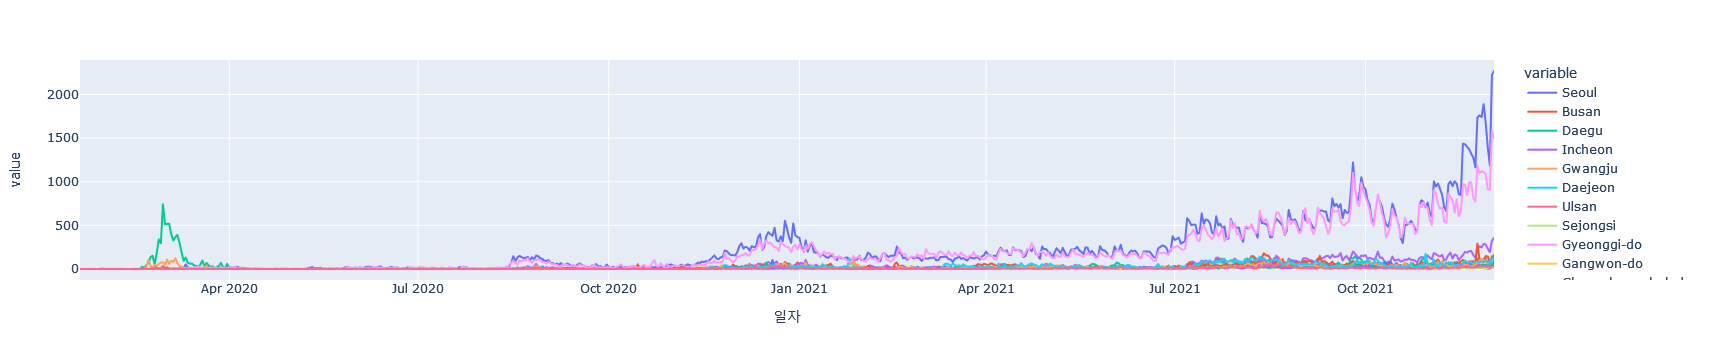

In [445]:
_df2.plot.line(x='일자',y='value',color='variable',backend='plotly')

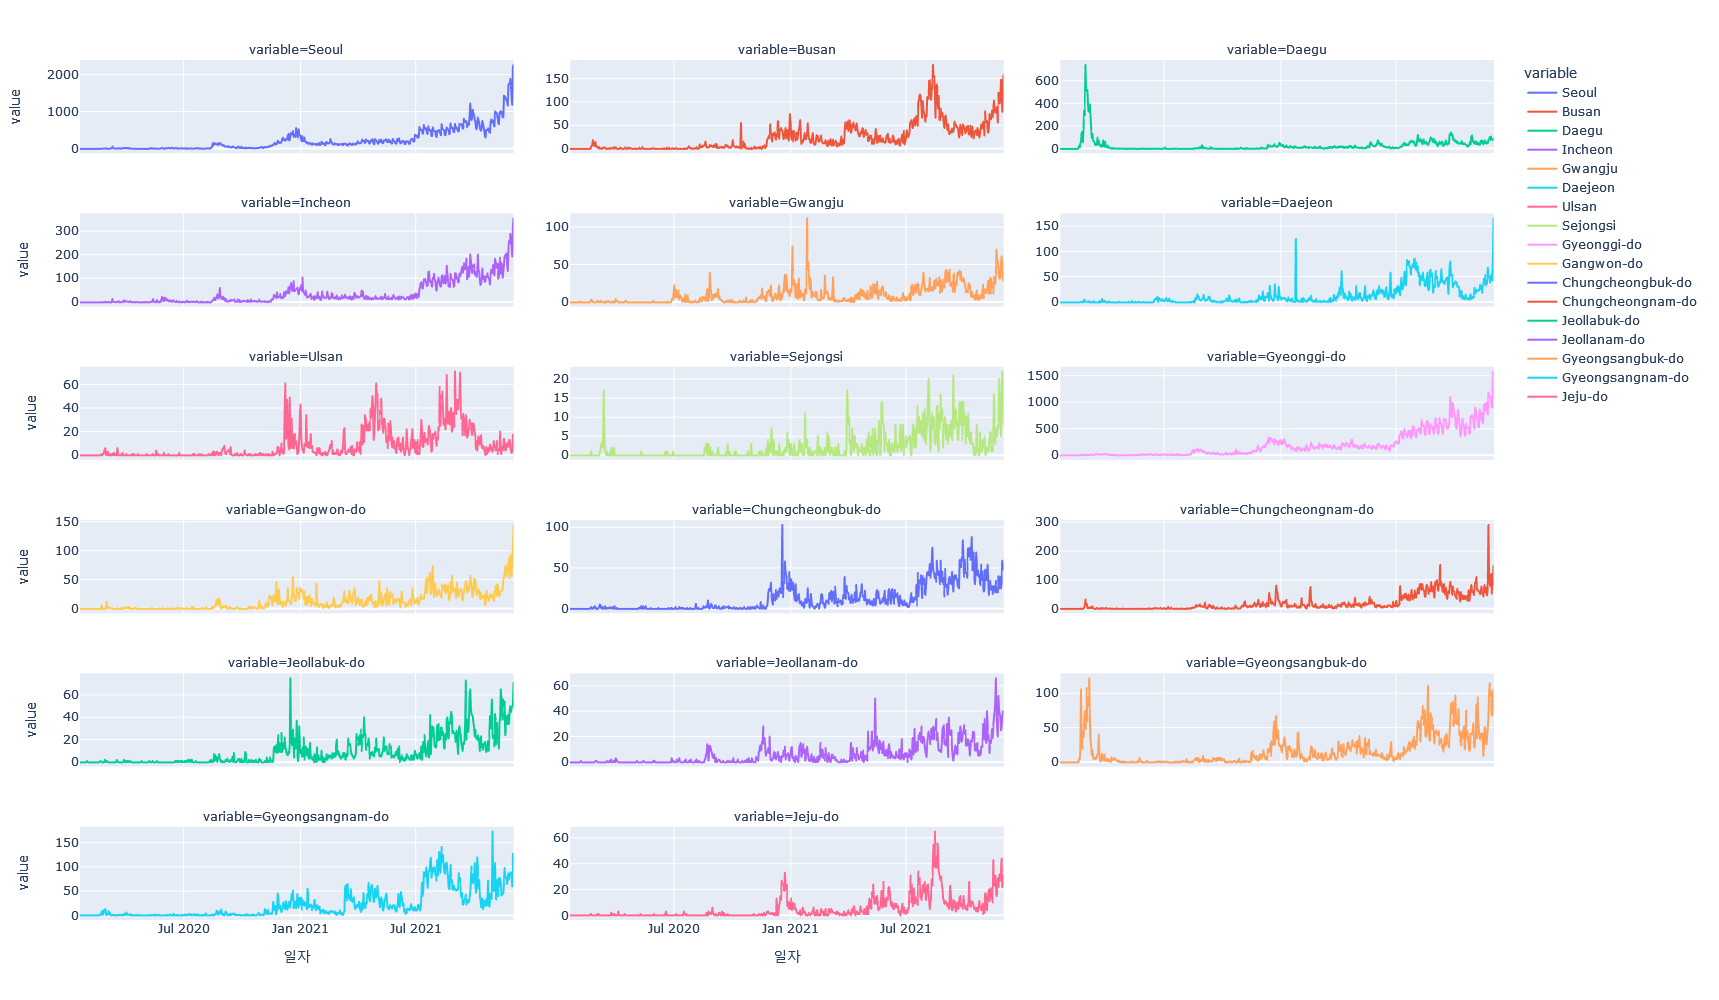

In [447]:
fig=_df2.plot.line(backend='plotly',
                 x='일자',
                 y='value',
                 color='variable',
                 facet_col='variable',
                 facet_col_wrap=3, 
                 facet_col_spacing=0.04,
                 height=1000)
fig.update_yaxes(matches=None,showticklabels=True) 

## `#4`. FIFA22 시각화

아래는 `FIFA22`라는 온라인게임에서 선수들의 능력치가 저정된 url이다. 
```
https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/2021-10-25-FIFA22_official_data.csv
```
판다스를 이용하여 위의 데이터를 불러온 이후 물음에 답하라. 

#### `(1)` 한국선수와 일본선수간 평균능력치를 barplot을 이용하여 비교하라. 비교하고 싶은 능력치의 목록은 아래와 같다. 

```python
abilities=['Crossing', 'Finishing','HeadingAccuracy','ShortPassing',
           'Volleys', 'Dribbling','Curve','FKAccuracy',
           'LongPassing','BallControl', 'Acceleration','SprintSpeed',
           'Agility', 'Reactions','Balance','ShotPower', 
           'Jumping', 'Stamina', 'Strength','LongShots',
           'Aggression','Interceptions', 'Positioning','Vision',
           'Penalties', 'Composure', 'StandingTackle','SlidingTackle']
```

**(주의) 판다스백엔드를 이용하지 않거나 아래의 시각화와 상이한 플랏이 그려질 경우 정답으로 인정하지 않음.** 

In [ ]:
#hide_input
HTML(requests.get('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/_html3').text)

**힌트1**. 한국과 일본의 국가명은 각각 `Korea Republic`와 `Japan`으로 저장되어 있다. 

## `#5`. 정권별 GDP/소득불균형 시각화